In [5]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.utils import shuffle
from keras import backend as K
K.image_data_format()
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
import glob
import os
import cv2
import warnings
warnings.filterwarnings("ignore")


In [27]:
train = "E:/OCT2017/train/"
test =  "E:/OCT2017/test/"
validation ="E:/OCT2017/val"


# Normal

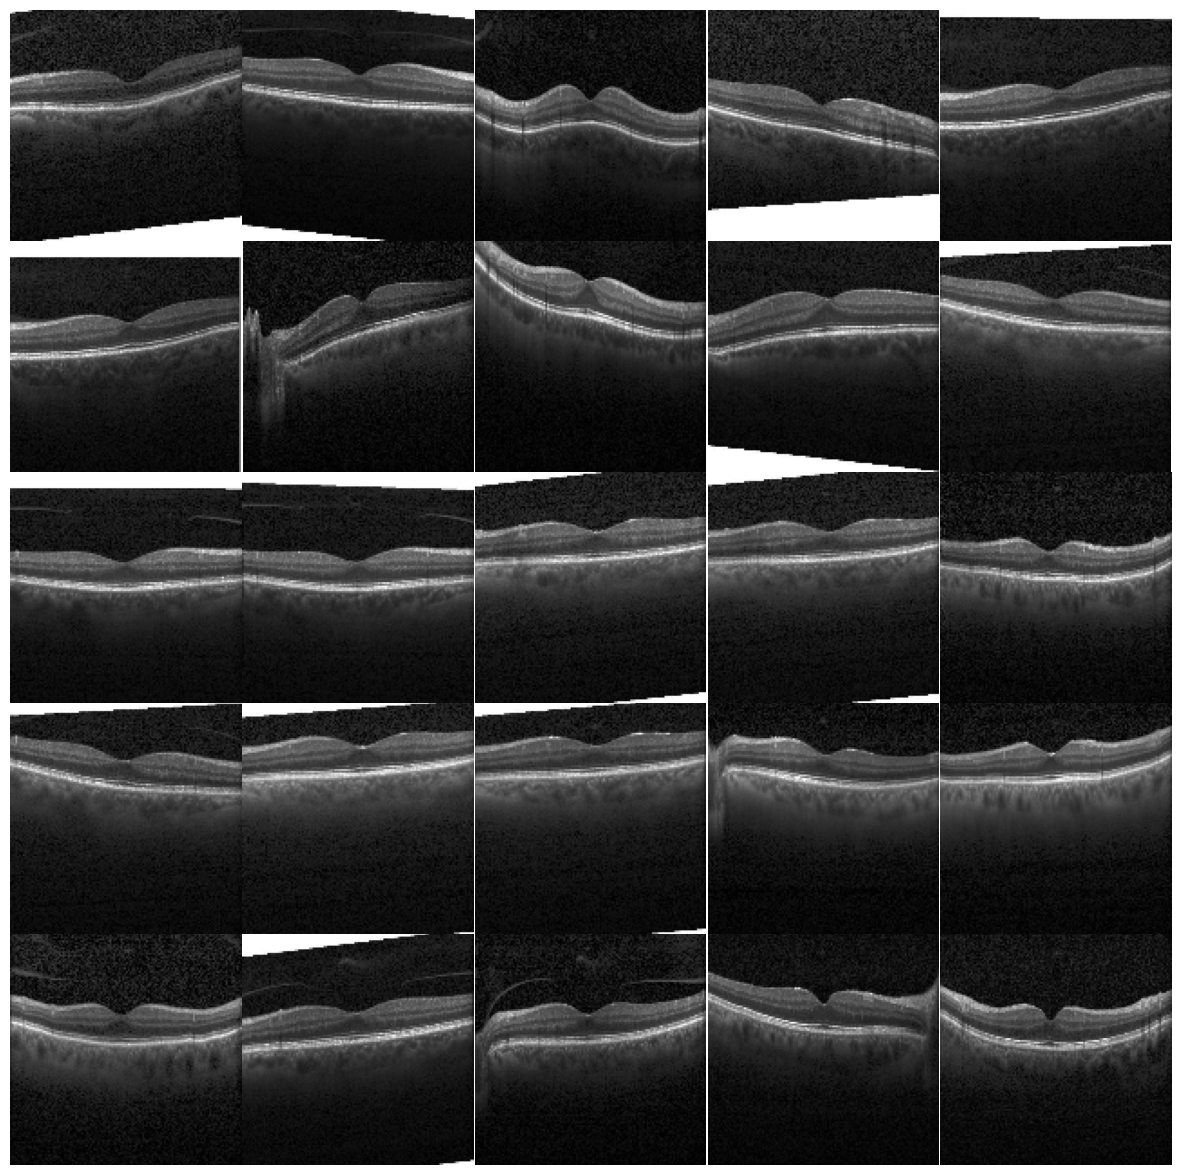

In [7]:
multipleImages = glob.glob('E:/OCT2017/train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

# Abnormality

## DME

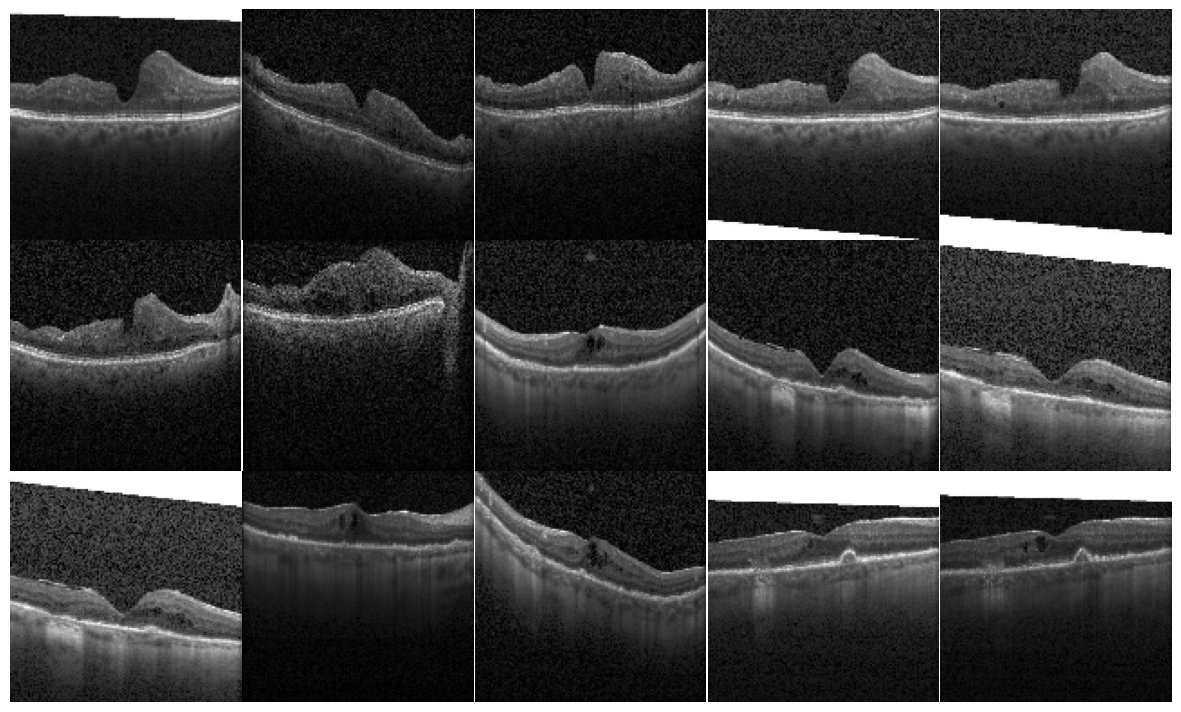

In [8]:
multipleImages = glob.glob('E:/OCT2017/train/DME/**')
i_ = 0
plt.rcParams['figure.figsize']  =  (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

## CNV 

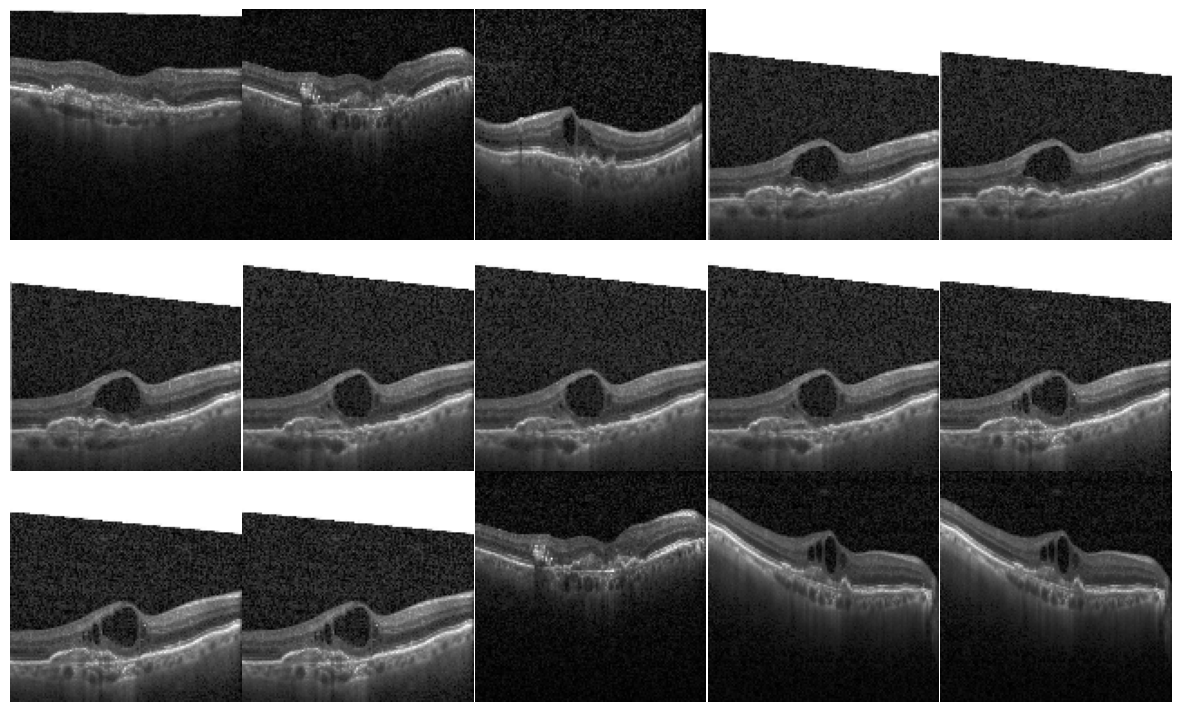

In [9]:
multipleImages = glob.glob('E:/OCT2017/train/CNV/**')
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

## DRUSEN

In [10]:
multipleImages = glob.glob('E:/OCT2017/train/DURSEN/**')
i_ = 0
plt.rcParams['figure.figsize']  = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

<Figure size 1500x1500 with 0 Axes>

# Image Preprocessing
- resizing
- denoising

## Train Set

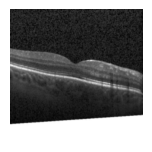

In [15]:
target_size = (224, 224)
result = 0
counter = 0

plt.figure(figsize=(10, 10))

for class_name in ["NORMAL", "CNV", "DRUSEN", "DME"]:
    input_path = os.path.join(train, class_name)
    output_path = f"processed_train/{class_name.lower()}"
    os.makedirs(output_path, exist_ok=True)   
    for filename in os.listdir(input_path):
        image_path = os.path.join(input_path, filename)
        output_image_path = os.path.join(output_path, filename)
        image = cv2.imread(image_path)
        
        resized_denoised_image = cv2.resize(denoised_image, target_size)
        cv2.imwrite(output_image_path, resized_denoised_image)
        
        if result < 4:
            plt.subplot(5, 5, i_+1)
            plt.imshow(cv2.cvtColor(resized_denoised_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            result += 1
            counter += 1

plt.show()


augment = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = augment.flow_from_directory(
    'processed_train/',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

## Validation set

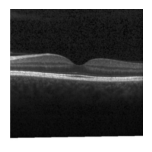

In [28]:
target_size = (224, 224)
result = 0
counter = 0

plt.figure(figsize=(10, 10))

for class_name in ["NORMAL", "CNV", "DRUSEN", "DME"]:
    input_path = os.path.join(validation, class_name)
    output_path = f"processed_val/{class_name.lower()}"
    os.makedirs(output_path, exist_ok=True)   
    for filename in os.listdir(input_path):
        image_path = os.path.join(input_path, filename)
        output_image_path = os.path.join(output_path, filename)
        image = cv2.imread(image_path)
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        resized_denoised_image = cv2.resize(denoised_image, target_size)
        cv2.imwrite(output_image_path, resized_denoised_image)
        
        if result < 4:
            plt.subplot(5, 5, i_+1)
            plt.imshow(cv2.cvtColor(resized_denoised_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            result += 1
            counter += 1

plt.show()

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

target_size = (224, 224)
batch_size = 32

augment = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

validation_generator = augment.flow_from_directory(
    'processed_val/',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


## Test set

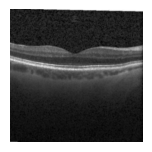

In [55]:
target_size = (224, 224)
result = 0
counter = 0

plt.figure(figsize=(10, 10))

for class_name in ["NORMAL", "CNV", "DRUSEN", "DME"]:
    input_path = os.path.join(test, class_name)
    output_path = f"processed_test/{class_name.lower()}"
    os.makedirs(output_path, exist_ok=True)   
    for filename in os.listdir(input_path):
        image_path = os.path.join(input_path, filename)
        output_image_path = os.path.join(output_path, filename)
        image = cv2.imread(image_path)
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        resized_denoised_image = cv2.resize(denoised_image, target_size)
        cv2.imwrite(output_image_path, resized_denoised_image)
        
        if result < 4:
            plt.subplot(5, 5, i_+1)
            plt.imshow(cv2.cvtColor(resized_denoised_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            result += 1
            counter += 1

plt.show()

augment = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_generator = augment.flow_from_directory(
    'processed_test/',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)